##### I want to have the code to reproduce all the tables in the manuscript in one place

In [2]:
import allel
from collections import namedtuple
import datetime
import h5py
import ingenos
import itertools
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import numpy as np
import pandas as pd
import re
import seaborn as sns
%matplotlib inline

##### read in data for 2R

In [2]:
'''v_2R, g_2R = ingenos.import_data(
    "/afs/crc.nd.edu/group/BesanskyNGS2/inversion_genotyping/merged_p2_and_VObs_2R.h5", "2R")'''

##### read in data for 2L

In [3]:
path_2L = "/afs/crc.nd.edu/group/BesanskyNGS2/inversion_genotyping/merged_p2_and_VObs_2L.h5"
chrom_2L = "2L"

In [4]:
callset_2L = h5py.File(path_2L, mode='r')[chrom_2L]

In [5]:
v_2L = allel.VariantChunkedTable(callset_2L['variants'], index='POS',
                                names=['POS','REF','ALT','DP','MQ','QD','numalt'])

In [6]:
g_2L = allel.GenotypeChunkedArray(callset_2L['calldata']['GT'])

##### read in metadata

In [3]:
md_2R = pd.read_csv("../metadata/all_samples_2R_metadata_annotated_sites_matching_052619.csv",
                    sep="\t")

md_2L = pd.read_csv("../metadata/all_samples_2L_metadata_annotated_sites_matching_051019.csv",
                    sep="\t")

##### make booleans

In [9]:
non_outliers = ((md_2R["country"] != "Kenya") &
                (md_2R["country"] != "Gambia, The") &
                (md_2R["country"] != "Guinea-Bissau")).values

west = (md_2R["country"] != "Kenya").values

j_bool = ((md_2R["country"] != "Kenya") & (md_2R["country"] != "Gambia, The") &\
          (md_2R["country"] != "Guinea-Bissau") & (md_2R["country"] != "France") &\
         (md_2R["species"] == "An. gambiae")).values

col_bool = ( (md_2R["ox_code"].isin(md_2R.loc[non_outliers,"ox_code"])) &\
                 (md_2R["species"] == "An. coluzzii"))

gam_bool = ( (md_2R["ox_code"].isin(md_2R.loc[non_outliers,"ox_code"])) &\
                 (md_2R["species"] == "An. gambiae"))

##### table 1: # candidate tag SNPs

##### read in tags, count length

##### table 2: mismatches between PCA and computational karyotypes in the Ag1K validation sets

##### read in metadata, read in validation set test-train splits, get booleans, get mismatches, # tags matching

In [5]:
splits = np.load("../metadata/comp_karyo_splits/splits.npy", allow_pickle=True).flat[0]

##### subset

In [6]:
md_2La = md_2L.loc[md_2L["ox_code"].isin(splits["2La"]["test"]),:]
md_2Rj = md_2R.loc[md_2R["ox_code"].isin(splits["2Rj"]["test"]),:]
md_2Rb = md_2R.loc[md_2R["ox_code"].isin(splits["2Rb"]["test"]),:]

md_2Rc_col = md_2R.loc[((md_2R["ox_code"].isin(splits["2Rc"]["test"])) &\
                                 (md_2R["species"] == "An. coluzzii")),:]

md_2Rc_gam = md_2R.loc[((md_2R["ox_code"].isin(splits["2Rc"]["test"])) &\
                                (md_2R["species"] == "An. gambiae") &\
                                (md_2R["2Rj"] != "2.0")),:]

md_2Rd = md_2R.loc[md_2R["ox_code"].isin(splits["2Rd"]["test"]),:]
md_2Ru = md_2R.loc[md_2R["ox_code"].isin(splits["2Ru"]["test"]),:]

##### except the data necessary is already part of the metadata

##### table 3: discrepancies between cytogenetic and computational karyotypes Ag1K mosquitoes analyzed

##### read in metadata, get specimens cytogenetically karyotyped, find those with discrepancies, get the number of tags, and their various data

##### table S1: specimen IDs and ENA accessions for Ag1000G phase 3 and VObs specimens

##### table S2: specimens used for computational karyotyping, by country and species

##### table s3: breakpoints

##### table S4: number of specimens with PCA assignments

##### low-coverage specimens for 2La, 2Rb, and 2Rc

##### low-coverage specimens for 2Rd, 2Rj, and 2Ru

##### 2La

In [9]:
coords_2La, model_2La = ingenos.run_pca("2La", v_2L, g_2L)

##### from 05_15_19_new_table_3

In [10]:
outliers_2La = ['AJ0138-C', 'AJ0155-C', 'AN0064-C', 'AN0108-C', 'AN0217-C',
       'AN0287-C', 'AN0451-C', 'AN0424-C', 'VBS02011', 'VBS02016',
       'VBS02041', 'VBS02042']

In [11]:
out_bool_a = (md_2L["ox_code"].isin(outliers_2La)).values
in_bool_a = (~ md_2L["ox_code"].isin(outliers_2La)).values

In [12]:
out_bool_a.shape

(1347,)

In [13]:
in_bool_a.shape

(1347,)

In [14]:
md_2L.shape

(1347, 30)

In [15]:
coords_2La[in_bool_a,:].shape

(1335, 10)

In [16]:
md_2La_in = md_2L.loc[in_bool_a,:]
md_2La_out = md_2L.loc[out_bool_a,:]

In [17]:
coords_2La_in = coords_2La[in_bool_a,:]
coords_2La_out = coords_2La[out_bool_a,:]

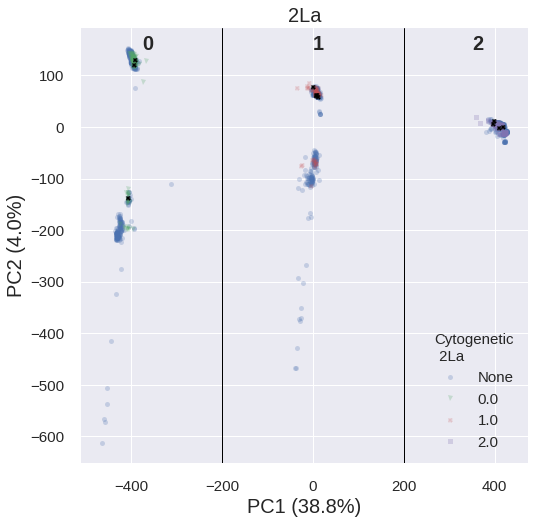

In [18]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

ingenos.plot_pca_coords(coords_2La_in, model_2La, 0, 1, ax, md_2La_in,
                region = "2La", label_with = "2La",
               alpha = 0.25, title = "2La")

for index, status in enumerate(md_2La_out["2La"].unique()):
            flt = (md_2La_out["2La"] == status).values
            ax.plot(coords_2La_out[:,0][flt], 
                    coords_2La_out[:,1][flt], marker="X", linestyle=' ',
                    color = 'k', markersize=5)

ax.text( -375, 150, "0", fontsize = 20, weight = 'bold')
ax.text( 0, 150, "1", fontsize = 20, weight = 'bold')
ax.text( 350, 150, "2", fontsize = 20, weight = 'bold')

ax.axvline(x = -200, color = 'k', linewidth = 1)
ax.axvline(x = 200, color = 'k', linewidth = 1)
plt.title("2La", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2La", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp("../data/results/2La_karyotyping_PCA_outliers_marked"));

##### visualize in reverse

'plt.savefig(ingenos.make_date_stamp(\n    "../data/results/2La_karyotyping_PCA_outliers_marked_reverse"));'

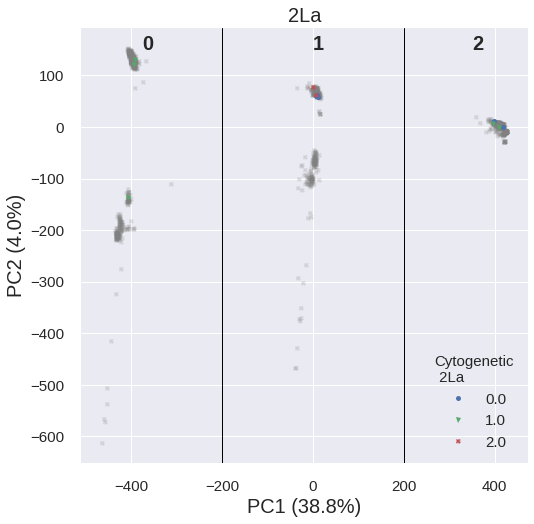

In [19]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2La_in["2La"].unique()):
            flt = (md_2La_in["2La"] == status).values
            ax.plot(coords_2La_in[:,0][flt], 
                    coords_2La_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2La_out, model_2La, 0, 1, ax, md_2La_out,
                region = "2La", label_with = "2La",
               alpha = 1, title = "2La")

ax.text( -375, 150, "0", fontsize = 20, weight = 'bold')
ax.text( 0, 150, "1", fontsize = 20, weight = 'bold')
ax.text( 350, 150, "2", fontsize = 20, weight = 'bold')

ax.axvline(x = -200, color = 'k', linewidth = 1)
ax.axvline(x = 200, color = 'k', linewidth = 1)
plt.title("2La", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2La", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2La_karyotyping_PCA_outliers_marked_reverse"));'''

##### 2Rb

In [20]:
np.sum(md_2R["country"] != "Kenya")

1299

In [21]:
coords_2Rb, model_2Rb = ingenos.run_pca("2Rb", v_2R, g_2R, samples_bool = west)

In [22]:
outliers_2Rb = ['AN0083-C', 'AN0084-C', 'AN0104-C', 'AN0117-C', 'AN0210-C',
       'AN0297-C', 'AN0298-C', 'AN0305-C', 'AB0315-C', 'AB0316-C',
       'VBS02011', 'VBS02016']

In [23]:
out_bool_b = (md_2R.loc[west,"ox_code"].isin(outliers_2Rb)).values
in_bool_b = (~ (md_2R.loc[west,"ox_code"].isin(outliers_2Rb))).values

md_2Rb_in = md_2R.loc[west,:].loc[in_bool_b,:]
md_2Rb_out = md_2R.loc[west,:].loc[out_bool_b,:]

coords_2Rb_in = coords_2Rb[in_bool_b,:]
coords_2Rb_out = coords_2Rb[out_bool_b,:]

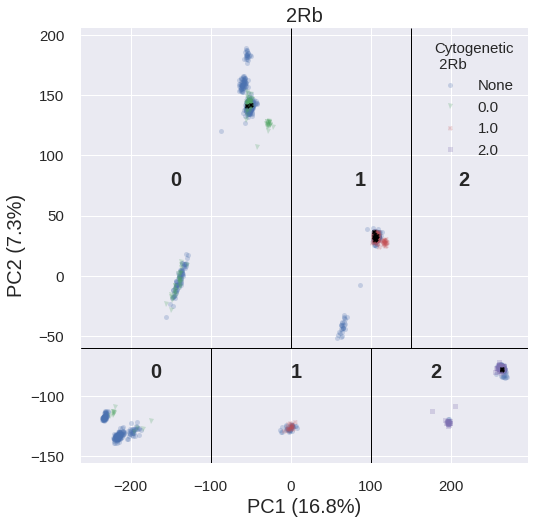

In [24]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

ingenos.plot_pca_coords(coords_2Rb_in, model_2Rb, 0, 1, ax, md_2Rb_in,
                region = "2Rb", label_with = "2Rb",
               alpha = 0.25, title = "2Rb")

for index, status in enumerate(md_2Rb_out["2Rb"].unique()):
            flt = (md_2Rb_out["2Rb"] == status).values
            ax.plot(coords_2Rb_out[:,0][flt], 
                    coords_2Rb_out[:,1][flt], marker="X", linestyle=' ',
                    color = 'k', markersize=5)

ax.text( -150, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 80, 75, "1", fontsize = 20, weight = 'bold')
ax.text( 210, 75, "2", fontsize = 20, weight = 'bold')
ax.text( -175, -85, "0", fontsize = 20, weight = 'bold')
ax.text( 0, -85, "1", fontsize = 20, weight = 'bold')
ax.text( 175, -85, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -60, color = 'k', linewidth = 1)
ymin, ymax = ax.get_ylim()
plt.vlines(-100, ymin, -60, color='k', linewidth = 1)
plt.vlines(100, ymin, -60, color='k', linewidth = 1)
plt.vlines(0, ymax, -60, color='k', linewidth = 1)
plt.vlines(150, ymax, -60, color='k', linewidth = 1)

ax.set_ylim(bottom=ymin, top=ymax)

plt.title("2Rb", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rb", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp("../data/results/2Rb_karyotyping_PCA_outliers_marked"));

##### reverse visualization

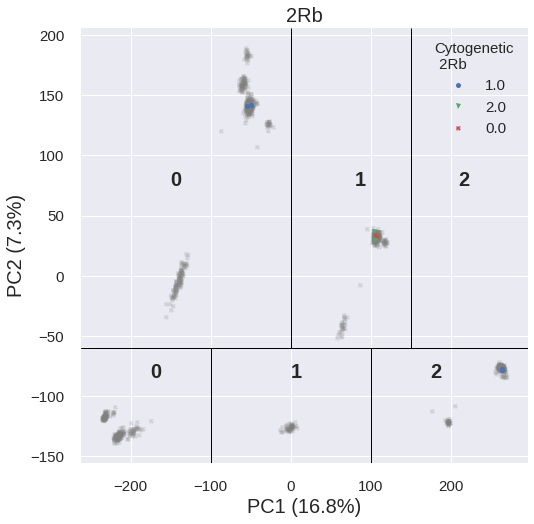

In [64]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rb_in["2Rb"].unique()):
            flt = (md_2Rb_in["2Rb"] == status).values
            ax.plot(coords_2Rb_in[:,0][flt], 
                    coords_2Rb_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Rb_out, model_2Rb, 0, 1, ax, md_2Rb_out,
                region = "2Rb", label_with = "2Rb",
               alpha = 1, title = "2Rb")

ax.text( -150, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 80, 75, "1", fontsize = 20, weight = 'bold')
ax.text( 210, 75, "2", fontsize = 20, weight = 'bold')
ax.text( -175, -85, "0", fontsize = 20, weight = 'bold')
ax.text( 0, -85, "1", fontsize = 20, weight = 'bold')
ax.text( 175, -85, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -60, color = 'k', linewidth = 1)
ymin, ymax = ax.get_ylim()
plt.vlines(-100, ymin, -60, color='k', linewidth = 1)
plt.vlines(100, ymin, -60, color='k', linewidth = 1)
plt.vlines(0, ymax, -60, color='k', linewidth = 1)
plt.vlines(150, ymax, -60, color='k', linewidth = 1)

ax.set_ylim(bottom=ymin, top=ymax)

plt.title("2Rb", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rb", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Rb_karyotyping_PCA_outliers_marked_reverse"));'''

##### 2Rc

In [26]:
coords_2Rc, model_2Rc = ingenos.run_pca("2Rc", v_2R, g_2R, samples_bool=non_outliers)

In [27]:
outliers_2Rc = ['AN0063-C', 'AN0075-C', 'AN0076-C', 'AN0105-C', 'AN0109-C',
       'AN0111-C', 'AN0112-C', 'AN0188-C', 'AB0313-C', 'AZ0253-C',
       'AZ0254-C', 'AZ0256-C', 'AZ0257-C', 'AZ0260-C', 'AZ0261-C',
       'AZ0262-C', 'AZ0267-C', 'AZ0283-C', 'VBS02011', 'VBS02016',
       'VBS02057', 'VBS02077', 'VBS02083', 'VBS02088', 'VBS02093',
       'VBS02094', 'VBS02096', 'VBS02097', 'VBS02100', 'VBS02103',
       'VBS02104', 'VBS02106', 'VBS02110', 'VBS02113', 'VBS02114',
       'VBS02115', 'VBS02119', 'VBS02128', 'VBS02130', 'VBS02132']

In [28]:
out_bool_c = (md_2R.loc[non_outliers,"ox_code"].isin(outliers_2Rc)).values
in_bool_c = (~ md_2R.loc[non_outliers,"ox_code"].isin(outliers_2Rc)).values

md_2Rc_in = md_2R.loc[non_outliers,:].loc[in_bool_c,:]
md_2Rc_out = md_2R.loc[non_outliers,:].loc[out_bool_c,:]

coords_2Rc_in = coords_2Rc[in_bool_c,:]
coords_2Rc_out = coords_2Rc[out_bool_c,:]

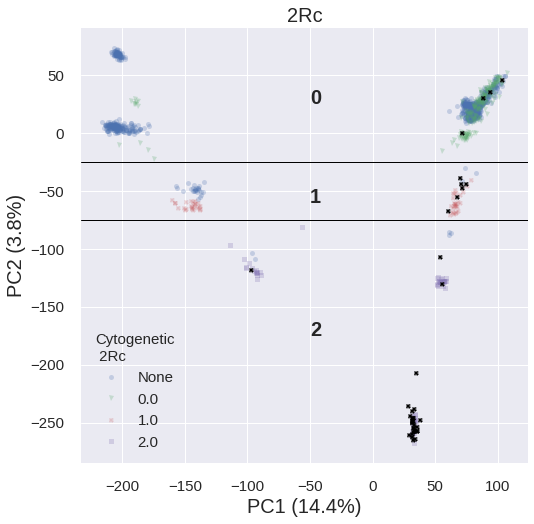

In [29]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)
ingenos.plot_pca_coords(coords_2Rc_in, model_2Rc, 0, 1, ax, md_2Rc_in,
                region = "2Rc", label_with = "2Rc",
               alpha = 0.25, title = "2Rc")

for index, status in enumerate(md_2Rc_out["2Rc"].unique()):
            flt = (md_2Rc_out["2Rc"] == status).values
            ax.plot(coords_2Rc_out[:,0][flt], 
                    coords_2Rc_out[:,1][flt], marker="X", linestyle=' ',
                    color = 'k', markersize=5)

ax.text( -50, 25, "0", fontsize = 20, weight = 'bold')
ax.text( -50, -60, "1", fontsize = 20, weight = 'bold')
ax.text( -50, -175, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -25, color = 'k', linewidth = 1)
ax.axhline(y = -75, color = 'k', linewidth = 1)

plt.title("2Rc", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rc", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp("../data/results/2Rc_karyotyping_PCA_outliers_marked"));

##### visualize in reverse

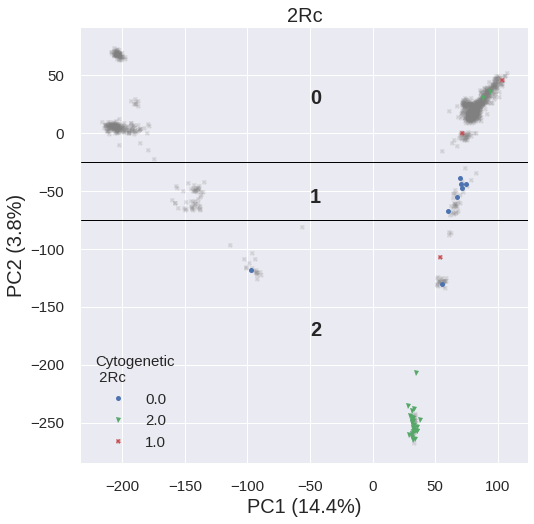

In [55]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rc_in["2Rc"].unique()):
            flt = (md_2Rc_in["2Rc"] == status).values
            ax.plot(coords_2Rc_in[:,0][flt], 
                    coords_2Rc_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Rc_out, model_2Rc, 0, 1, ax, md_2Rc_out,
                region = "2Rc", label_with = "2Rc",
               alpha = 1, title = "2Rc")

ax.text( -50, 25, "0", fontsize = 20, weight = 'bold')
ax.text( -50, -60, "1", fontsize = 20, weight = 'bold')
ax.text( -50, -175, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -25, color = 'k', linewidth = 1)
ax.axhline(y = -75, color = 'k', linewidth = 1)

plt.title("2Rc", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rc", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Rc_karyotyping_PCA_outliers_marked_reverse"));'''

##### now by computational/PCA 2Ru

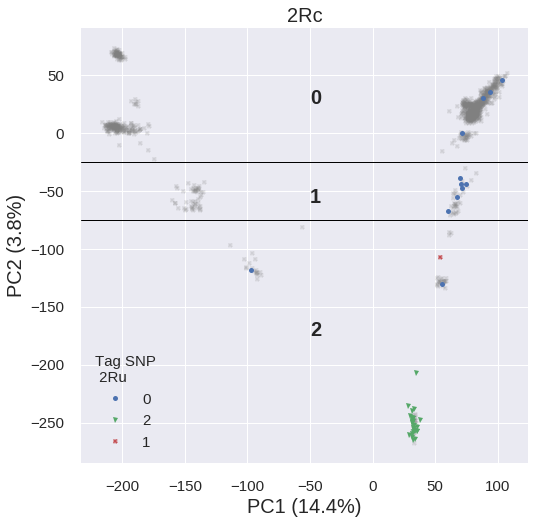

In [57]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rc_in["2Rc"].unique()):
            flt = (md_2Rc_in["2Rc"] == status).values
            ax.plot(coords_2Rc_in[:,0][flt], 
                    coords_2Rc_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Rc_out, model_2Rc, 0, 1, ax, md_2Rc_out,
                region = "2Rc", label_with = "2Ru_assigned",
               alpha = 1, title = "2Rc")

ax.text( -50, 25, "0", fontsize = 20, weight = 'bold')
ax.text( -50, -60, "1", fontsize = 20, weight = 'bold')
ax.text( -50, -175, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -25, color = 'k', linewidth = 1)
ax.axhline(y = -75, color = 'k', linewidth = 1)

plt.title("2Rc", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Tag SNP\n 2Ru", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Rc_karyotyping_PCA_outliers_marked_2Ru_tag_SNP"));'''

##### no cytogenetic-computational mismatches in 2Rj

##### 2Rd

In [12]:
d_sites_expression = '( (POS > 38000000) & (POS < 42600500) )'

In [13]:
d_sites_bool = v_2R.eval(d_sites_expression)

In [14]:
np.sum(d_sites_bool)

994642

In [15]:
two_Rd_alt_alleles, two_Rd_which_alleles = ingenos.filter_and_convert_genotypes(g_2R,
                                            sites_boolean = d_sites_bool,
                                            samples_boolean = j_bool,
                                            min_count = 3,
                                            variance_threshold = 0.03)

In [16]:
coords_2Rd, model_2Rd = allel.stats.pca(two_Rd_alt_alleles)

In [17]:
outliers_2Rd = ['AJ0128-C', 'AJ0130-C', 'AJ0131-C', 'AJ0135-C', 'AJ0136-C',
       'AJ0137-C', 'AJ0142-C', 'AJ0146-C', 'AJ0149-C', 'AJ0152-C',
       'AJ0153-C', 'AJ0154-C', 'AJ0156-C', 'AJ0159-C', 'AN0063-C',
       'AN0066-C', 'AN0069-C', 'AN0076-C', 'AN0084-C', 'AN0093-C',
       'AN0100-C', 'AN0101-C', 'AN0102-C', 'AN0105-C', 'AN0112-C',
       'AN0119-C', 'AN0280-C', 'AB0313-C', 'AB0323-C', 'VBS02011',
       'VBS02016', 'VBS02051', 'VBS02052', 'VBS02053', 'VBS02054',
       'VBS02055']

In [18]:
out_bool_d = (md_2R.loc[j_bool,"ox_code"].isin(outliers_2Rd)).values
in_bool_d = (~ md_2R.loc[j_bool,"ox_code"].isin(outliers_2Rd)).values

md_2Rd_in = md_2R.loc[j_bool,:].loc[in_bool_d,:]
md_2Rd_out = md_2R.loc[j_bool,:].loc[out_bool_d,:]

coords_2Rd_in = coords_2Rd[in_bool_d,:]
coords_2Rd_out = coords_2Rd[out_bool_d,:]

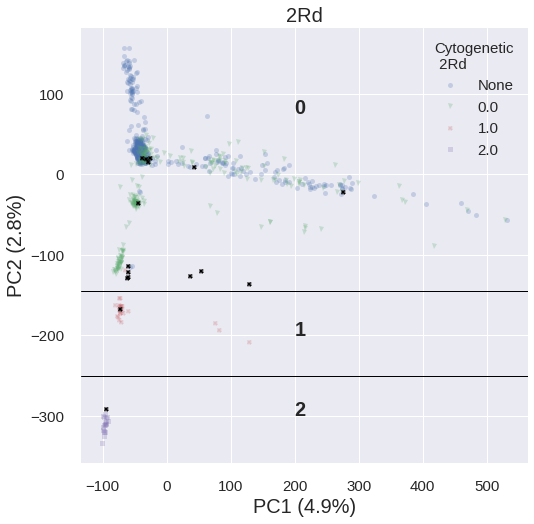

In [39]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

ingenos.plot_pca_coords(coords_2Rd_in, model_2Rd, 0, 1, ax, md_2Rd_in,
                region = "2Rd", label_with = "2Rd",
               alpha = 0.25, title = "2Rd")

for index, status in enumerate(md_2Rd_out["2Rd"].unique()):
            flt = (md_2Rd_out["2Rd"] == status).values
            ax.plot(coords_2Rd_out[:,0][flt], 
                    coords_2Rd_out[:,1][flt], marker="X", linestyle=' ',
                    color = 'k', markersize=5)

ax.text( 200, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 200, -200, "1", fontsize = 20, weight = 'bold')
ax.text( 200, -300, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -145, color = 'k', linewidth = 1)
ax.axhline(y = -250, color = 'k', linewidth = 1)

plt.title("2Rd", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rd", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp("../data/results/2Rd_karyotyping_PCA_outliers_marked"));

##### and in reverse

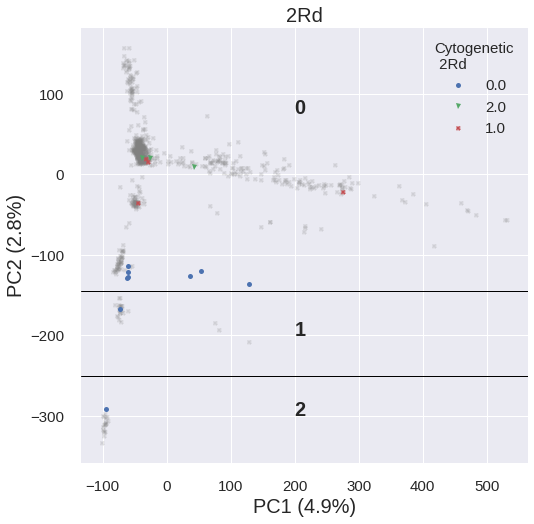

In [66]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rd_in["2Rd"].unique()):
            flt = (md_2Rd_in["2Rd"] == status).values
            ax.plot(coords_2Rd_in[:,0][flt], 
                    coords_2Rd_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Rd_out, model_2Rd, 0, 1, ax, md_2Rd_out,
                region = "2Rd", label_with = "2Rd",
               alpha = 1, title = "2Rd")

ax.text( 200, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 200, -200, "1", fontsize = 20, weight = 'bold')
ax.text( 200, -300, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -145, color = 'k', linewidth = 1)
ax.axhline(y = -250, color = 'k', linewidth = 1)

plt.title("2Rd", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rd", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Rd_karyotyping_PCA_outliers_marked_reverse"));'''

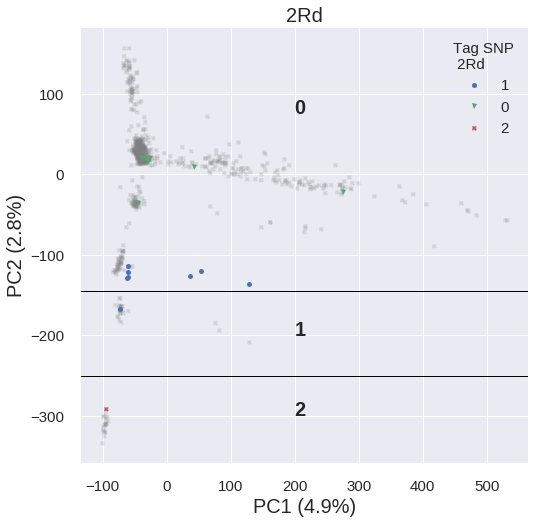

In [73]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rd_in["2Rd"].unique()):
            flt = (md_2Rd_in["2Rd"] == status).values
            ax.plot(coords_2Rd_in[:,0][flt], 
                    coords_2Rd_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Rd_out, model_2Rd, 0, 1, ax, md_2Rd_out,
                region = "2Rd", label_with = "2Rd_assigned",
               alpha = 1, title = "2Rd")

ax.text( 200, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 200, -200, "1", fontsize = 20, weight = 'bold')
ax.text( 200, -300, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -145, color = 'k', linewidth = 1)
ax.axhline(y = -250, color = 'k', linewidth = 1)

plt.title("2Rd", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Tag SNP\n 2Rd", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Rd_karyotyping_PCA_outliers_marked_by_tag_SNPs_reverse"));'''

##### now I want to visualize this a bit differently.

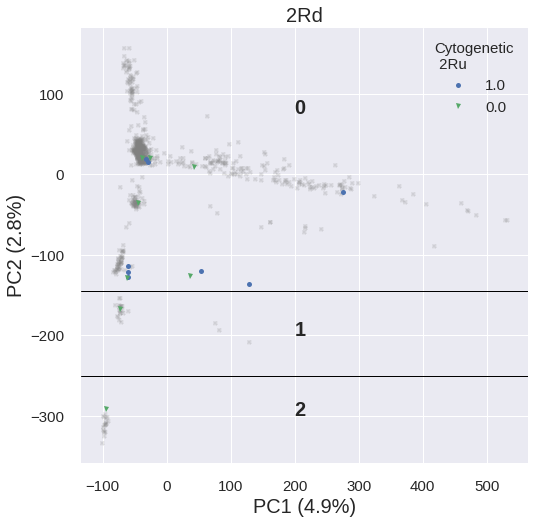

In [67]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rd_in["2Rd"].unique()):
            flt = (md_2Rd_in["2Rd"] == status).values
            ax.plot(coords_2Rd_in[:,0][flt], 
                    coords_2Rd_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Rd_out, model_2Rd, 0, 1, ax, md_2Rd_out,
                region = "2Rd", label_with = "2Ru",
               alpha = 1, title = "2Rd")

ax.text( 200, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 200, -200, "1", fontsize = 20, weight = 'bold')
ax.text( 200, -300, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -145, color = 'k', linewidth = 1)
ax.axhline(y = -250, color = 'k', linewidth = 1)

plt.title("2Rd", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Ru", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Rd_karyotyping_PCA_outliers_marked_by_2Ru"));'''

##### and what about PCA and computational u karyotype?

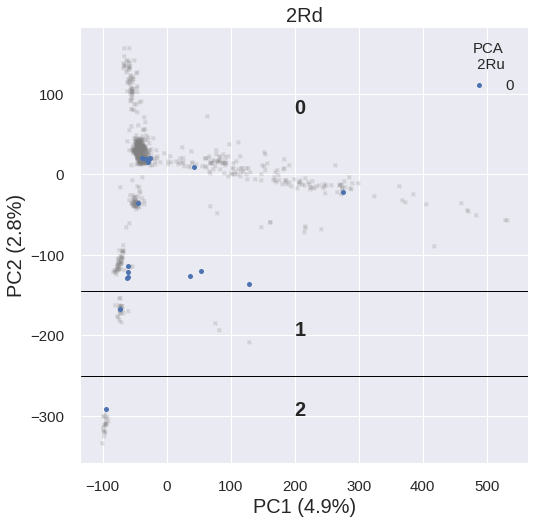

In [68]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rd_in["2Rd"].unique()):
            flt = (md_2Rd_in["2Rd"] == status).values
            ax.plot(coords_2Rd_in[:,0][flt], 
                    coords_2Rd_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Rd_out, model_2Rd, 0, 1, ax, md_2Rd_out,
                region = "2Rd", label_with = "new_PCA_2Ru",
               alpha = 1, title = "2Rd")

ax.text( 200, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 200, -200, "1", fontsize = 20, weight = 'bold')
ax.text( 200, -300, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -145, color = 'k', linewidth = 1)
ax.axhline(y = -250, color = 'k', linewidth = 1)

plt.title("2Rd", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "PCA\n 2Ru", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Rd_karyotyping_PCA_outliers_marked_by_2Ru_PCA"));'''

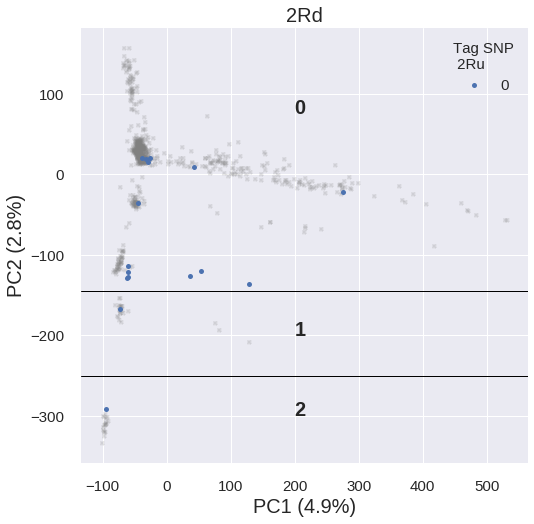

In [69]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Rd_in["2Rd"].unique()):
            flt = (md_2Rd_in["2Rd"] == status).values
            ax.plot(coords_2Rd_in[:,0][flt], 
                    coords_2Rd_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Rd_out, model_2Rd, 0, 1, ax, md_2Rd_out,
                region = "2Rd", label_with = "2Ru_assigned",
               alpha = 1, title = "2Rd")

ax.text( 200, 75, "0", fontsize = 20, weight = 'bold')
ax.text( 200, -200, "1", fontsize = 20, weight = 'bold')
ax.text( 200, -300, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = -145, color = 'k', linewidth = 1)
ax.axhline(y = -250, color = 'k', linewidth = 1)

plt.title("2Rd", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Tag SNP\n 2Ru", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Rd_karyotyping_PCA_outliers_marked_by_tag_SNP_2Ru"));'''

In [43]:
md_2Rd_out[["ox_code","2Rd","2Ru","new_PCA_2Ru","new_PCA_2Rd"]]

,ox_code,2Rd,2Ru,new_PCA_2Ru,new_PCA_2Rd
604,AN0063-C,0.0,1.0,0,0.0
607,AN0066-C,0.0,1.0,0,0.0
610,AN0069-C,0.0,1.0,0,0.0
617,AN0076-C,0.0,0.0,0,0.0
624,AN0084-C,2.0,0.0,0,0.0
633,AN0093-C,2.0,0.0,0,0.0
640,AN0100-C,0.0,1.0,0,0.0
641,AN0101-C,1.0,1.0,0,0.0
642,AN0102-C,1.0,1.0,0,0.0
645,AN0105-C,0.0,1.0,0,0.0


##### 2Ru

In [19]:
coords_2Ru, model_2Ru = ingenos.run_pca("2Ru", v_2R, g_2R, samples_bool=non_outliers)

In [20]:
outliers_2Ru = ['AN0063-C', 'AN0066-C', 'AN0069-C', 'AN0070-C', 'AN0100-C',
       'AN0101-C', 'AN0102-C', 'AN0105-C', 'AN0194-C', 'AN0280-C',
       'AN0284-C', 'AN0493-C', 'AB0324-C', 'AB0325-C', 'AZ0270-C',
       'AZ0272-C', 'AZ0273-C', 'AZ0275-C', 'VBS02050', 'VBS02051']

In [21]:
out_bool_u = (md_2R.loc[non_outliers,"ox_code"].isin(outliers_2Ru)).values
in_bool_u = (~ md_2R.loc[non_outliers,"ox_code"].isin(outliers_2Ru)).values

md_2Ru_in = md_2R.loc[non_outliers,:].loc[in_bool_u,:]
md_2Ru_out = md_2R.loc[non_outliers,:].loc[out_bool_u,:]

coords_2Ru_in = coords_2Ru[in_bool_u,:]
coords_2Ru_out = coords_2Ru[out_bool_u,:]

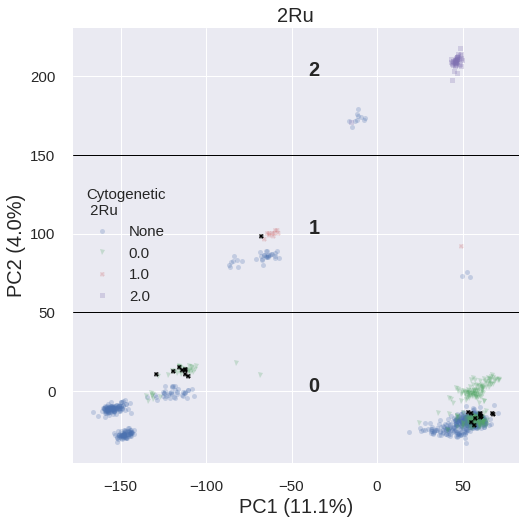

In [47]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

ingenos.plot_pca_coords(coords_2Ru_in, model_2Ru, 0, 1, ax, md_2Ru_in,
                region = "2Ru", label_with = "2Ru",
               alpha = 0.25, title = "2Ru")

for index, status in enumerate(md_2Ru_out["2Ru"].unique()):
            flt = (md_2Ru_out["2Ru"] == status).values
            ax.plot(coords_2Ru_out[:,0][flt], 
                    coords_2Ru_out[:,1][flt], marker="X", linestyle=' ',
                    color = 'k', markersize=5)

ax.text( -40, 0, "0", fontsize = 20, weight = 'bold')
ax.text( -40, 100, "1", fontsize = 20, weight = 'bold')
ax.text( -40, 200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = 150, color = 'k', linewidth = 1)
ax.axhline(y = 50, color = 'k', linewidth = 1)

plt.title("2Ru", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Ru", fontsize=15)
legend.get_title().set_fontsize('15')

#plt.savefig(ingenos.make_date_stamp("../data/results/2Ru_karyotyping_PCA_outliers_marked"));

##### reverse

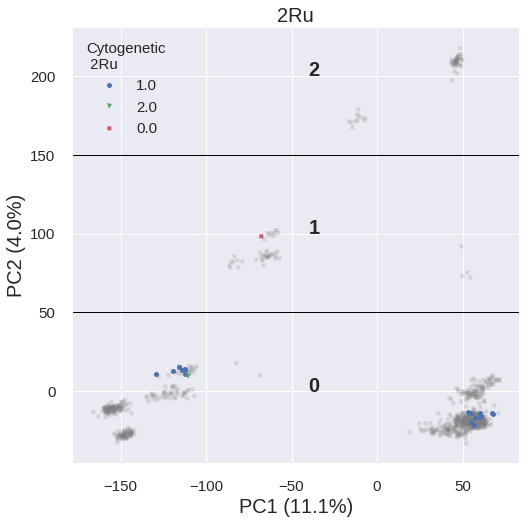

In [62]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Ru_in["2Ru"].unique()):
            flt = (md_2Ru_in["2Ru"] == status).values
            ax.plot(coords_2Ru_in[:,0][flt], 
                    coords_2Ru_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Ru_out, model_2Ru, 0, 1, ax, md_2Ru_out,
                region = "2Ru", label_with = "2Ru",
               alpha = 1, title = "2Ru")

ax.text( -40, 0, "0", fontsize = 20, weight = 'bold')
ax.text( -40, 100, "1", fontsize = 20, weight = 'bold')
ax.text( -40, 200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = 150, color = 'k', linewidth = 1)
ax.axhline(y = 50, color = 'k', linewidth = 1)

plt.title("2Ru", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Ru", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Ru_karyotyping_PCA_outliers_marked_reverse"));'''

##### repeat the same visualization with d as above

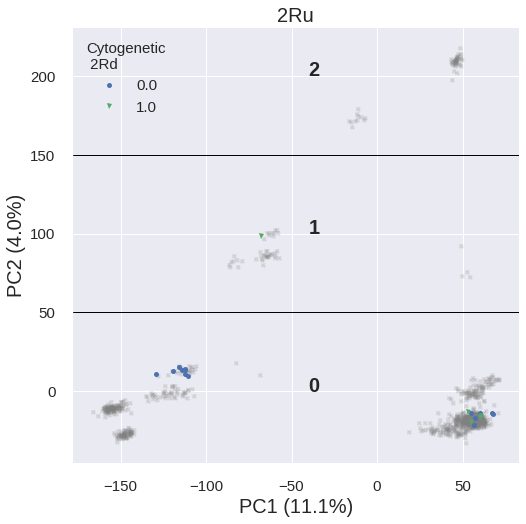

In [70]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Ru_in["2Ru"].unique()):
            flt = (md_2Ru_in["2Ru"] == status).values
            ax.plot(coords_2Ru_in[:,0][flt], 
                    coords_2Ru_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Ru_out, model_2Ru, 0, 1, ax, md_2Ru_out,
                region = "2Ru", label_with = "2Rd",
               alpha = 1, title = "2Ru")

ax.text( -40, 0, "0", fontsize = 20, weight = 'bold')
ax.text( -40, 100, "1", fontsize = 20, weight = 'bold')
ax.text( -40, 200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = 150, color = 'k', linewidth = 1)
ax.axhline(y = 50, color = 'k', linewidth = 1)

plt.title("2Ru", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Cytogenetic\n 2Rd", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Ru_karyotyping_PCA_outliers_marked_by_2Rd"));'''

##### and with other kinds of karyotypes

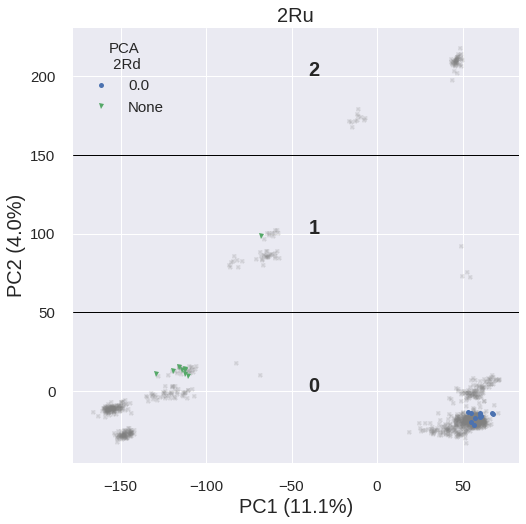

In [71]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Ru_in["2Ru"].unique()):
            flt = (md_2Ru_in["2Ru"] == status).values
            ax.plot(coords_2Ru_in[:,0][flt], 
                    coords_2Ru_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Ru_out, model_2Ru, 0, 1, ax, md_2Ru_out,
                region = "2Ru", label_with = "new_PCA_2Rd",
               alpha = 1, title = "2Ru")

ax.text( -40, 0, "0", fontsize = 20, weight = 'bold')
ax.text( -40, 100, "1", fontsize = 20, weight = 'bold')
ax.text( -40, 200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = 150, color = 'k', linewidth = 1)
ax.axhline(y = 50, color = 'k', linewidth = 1)

plt.title("2Ru", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "PCA\n 2Rd", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Ru_karyotyping_PCA_outliers_marked_by_PCA_2Rd"));'''

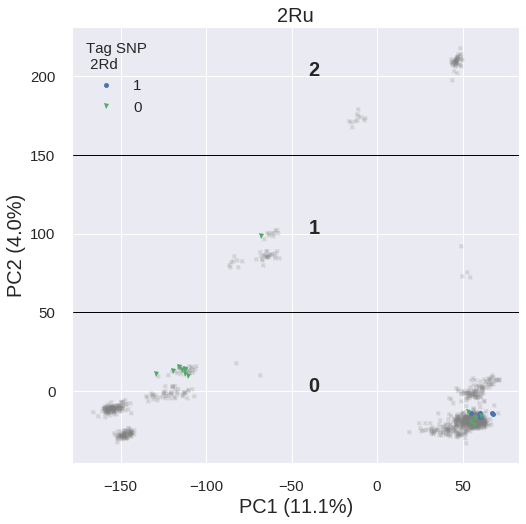

In [72]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(ax = ax, offset = 10)

for index, status in enumerate(md_2Ru_in["2Ru"].unique()):
            flt = (md_2Ru_in["2Ru"] == status).values
            ax.plot(coords_2Ru_in[:,0][flt], 
                    coords_2Ru_in[:,1][flt], marker="X", linestyle=' ',
                    color = 'grey', markersize=5, alpha=0.25)

ingenos.plot_pca_coords(coords_2Ru_out, model_2Ru, 0, 1, ax, md_2Ru_out,
                region = "2Ru", label_with = "2Rd_assigned",
               alpha = 1, title = "2Ru")

ax.text( -40, 0, "0", fontsize = 20, weight = 'bold')
ax.text( -40, 100, "1", fontsize = 20, weight = 'bold')
ax.text( -40, 200, "2", fontsize = 20, weight = 'bold')

ax.axhline(y = 150, color = 'k', linewidth = 1)
ax.axhline(y = 50, color = 'k', linewidth = 1)

plt.title("2Ru", fontsize=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.tick_params(axis='both', which='major', labelsize=15)

legend = ax.legend(title = "Tag SNP\n 2Rd", fontsize=15)
legend.get_title().set_fontsize('15')

'''plt.savefig(ingenos.make_date_stamp(
    "../data/results/2Ru_karyotyping_PCA_outliers_marked_by_tag_SNP_2Rd"));'''

##### look closer at metadata

In [51]:
md_2Rd_out[["ox_code","country","2Rd","2Ru","new_PCA_2Rd","new_PCA_2Ru",
            "2Rd_assigned","2Ru_assigned"]]

,ox_code,country,2Rd,2Ru,new_PCA_2Rd,new_PCA_2Ru,2Rd_assigned,2Ru_assigned
604,AN0063-C,Cameroon,0.0,1.0,0.0,0,1,0
607,AN0066-C,Cameroon,0.0,1.0,0.0,0,1,0
610,AN0069-C,Cameroon,0.0,1.0,0.0,0,1,0
617,AN0076-C,Cameroon,0.0,0.0,0.0,0,1,0
624,AN0084-C,Cameroon,2.0,0.0,0.0,0,0,0
633,AN0093-C,Cameroon,2.0,0.0,0.0,0,0,0
640,AN0100-C,Cameroon,0.0,1.0,0.0,0,1,0
641,AN0101-C,Cameroon,1.0,1.0,0.0,0,0,0
642,AN0102-C,Cameroon,1.0,1.0,0.0,0,0,0
645,AN0105-C,Cameroon,0.0,1.0,0.0,0,1,0


##### compile mismatches

In [44]:
out_2Rd = md_2Rd_out[["ox_code","species","country","2Rd","new_PCA_2Rd","2Rd_assigned",
                      "2Ru","new_PCA_2Ru","2Ru_assigned"]]

out_2Rd["which"] = "2Rd"

out_2Ru = md_2Ru_out[["ox_code","species","country","2Rd","new_PCA_2Rd","2Rd_assigned",
                      "2Ru","new_PCA_2Ru","2Ru_assigned"]]

out_2Ru["which"] = "2Ru"

/afs/crc.nd.edu/user/r/rlove1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/afs/crc.nd.edu/user/r/rlove1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
out_2Ru.loc[out_2Ru["ox_code"].isin(out_2Rd["ox_code"].values),"which"] = "both"
out_2Rd.loc[out_2Rd["ox_code"].isin(out_2Ru["ox_code"].values),"which"] = "both"

/afs/crc.nd.edu/user/r/rlove1/.local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
out_du = pd.concat([out_2Rd,out_2Ru]).drop_duplicates()

In [47]:
out_du

,ox_code,species,country,2Rd,new_PCA_2Rd,2Rd_assigned,2Ru,new_PCA_2Ru,2Ru_assigned,which
604,AN0063-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
607,AN0066-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
610,AN0069-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
617,AN0076-C,An. gambiae,Cameroon,0.0,0.0,1,0.0,0,0,2Rd
624,AN0084-C,An. gambiae,Cameroon,2.0,0.0,0,0.0,0,0,2Rd
633,AN0093-C,An. gambiae,Cameroon,2.0,0.0,0,0.0,0,0,2Rd
640,AN0100-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
641,AN0101-C,An. gambiae,Cameroon,1.0,0.0,0,1.0,0,0,both
642,AN0102-C,An. gambiae,Cameroon,1.0,0.0,0,1.0,0,0,both
645,AN0105-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both


In [54]:
'''out_du.to_csv("../data/results/2Rdu_outliers_051619.csv", index=False)'''

In [49]:
out_du.loc[out_du["species"] != "An. coluzzii"]

,ox_code,species,country,2Rd,new_PCA_2Rd,2Rd_assigned,2Ru,new_PCA_2Ru,2Ru_assigned,which
604,AN0063-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
607,AN0066-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
610,AN0069-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
617,AN0076-C,An. gambiae,Cameroon,0.0,0.0,1,0.0,0,0,2Rd
624,AN0084-C,An. gambiae,Cameroon,2.0,0.0,0,0.0,0,0,2Rd
633,AN0093-C,An. gambiae,Cameroon,2.0,0.0,0,0.0,0,0,2Rd
640,AN0100-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
641,AN0101-C,An. gambiae,Cameroon,1.0,0.0,0,1.0,0,0,both
642,AN0102-C,An. gambiae,Cameroon,1.0,0.0,0,1.0,0,0,both
645,AN0105-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both


In [50]:
out_du["which"].value_counts()

2Ru     12
2Rd      8
both     8
Name: which, dtype: int64

In [51]:
out_du.loc[out_du["species"] != "An. coluzzii","which"].value_counts()

2Rd     8
both    8
2Ru     3
Name: which, dtype: int64

In [52]:
out_du.loc[out_du["which"] == "both",:]

,ox_code,species,country,2Rd,new_PCA_2Rd,2Rd_assigned,2Ru,new_PCA_2Ru,2Ru_assigned,which
604,AN0063-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
607,AN0066-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
610,AN0069-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
640,AN0100-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
641,AN0101-C,An. gambiae,Cameroon,1.0,0.0,0,1.0,0,0,both
642,AN0102-C,An. gambiae,Cameroon,1.0,0.0,0,1.0,0,0,both
645,AN0105-C,An. gambiae,Cameroon,0.0,0.0,1,1.0,0,0,both
805,AN0280-C,An. gambiae,Cameroon,1.0,0.0,0,1.0,0,0,both


In [55]:
md_2Rd_out

,ox_code,src_code,old_ox_code,Sanger_ID,population,country,region,year,species,sex,...,2Rd_assigned,2Rd_means,2Rd_called,2Rd_sites_matching,2Rd_pct_sites_matching,2Ru_assigned,2Ru_means,2Ru_called,2Ru_sites_matching,2Ru_pct_sites_matching
604,AN0063-C,CM0901970,None,None,CMgam,Cameroon,Zembe-Borongo,2009.0,An. gambiae,F,...,1,1.043796,137,127,0.927007,0,0.085227,176,161,0.914773
607,AN0066-C,CM0901975,None,None,CMgam,Cameroon,Zembe-Borongo,2009.0,An. gambiae,F,...,1,1.007246,138,129,0.934783,0,0.062147,177,166,0.937853
610,AN0069-C,CM0902007,None,None,CMgam,Cameroon,Zembe-Borongo,2009.0,An. gambiae,F,...,1,0.949640,139,124,0.892086,0,0.084746,177,162,0.915254
617,AN0076-C,CM0902072,None,None,CMgam,Cameroon,Zembe-Borongo,2009.0,An. gambiae,F,...,1,1.014493,138,132,0.956522,0,0.085227,176,161,0.914773
624,AN0084-C,CM0902082,None,None,CMgam,Cameroon,Zembe-Borongo,2009.0,An. gambiae,F,...,0,0.072464,138,128,0.927536,0,0.051136,176,167,0.948864
633,AN0093-C,CM0902162,None,None,CMgam,Cameroon,Gado-Badzere,2009.0,An. gambiae,F,...,0,0.115108,139,123,0.884892,0,0.103448,174,159,0.913793
640,AN0100-C,CM0902207,None,None,CMgam,Cameroon,Gado-Badzere,2009.0,An. gambiae,F,...,1,0.934783,138,117,0.847826,0,0.118644,177,158,0.892655
641,AN0101-C,CM0902229,None,None,CMgam,Cameroon,Gado-Badzere,2009.0,An. gambiae,F,...,0,0.115108,139,123,0.884892,0,0.079545,176,163,0.926136
642,AN0102-C,CM0902232,None,None,CMgam,Cameroon,Gado-Badzere,2009.0,An. gambiae,F,...,0,0.064748,139,130,0.935252,0,0.090395,177,162,0.915254
645,AN0105-C,CM0902302,None,None,CMgam,Cameroon,Gado-Badzere,2009.0,An. gambiae,F,...,1,1.057554,139,129,0.928058,0,0.124294,177,157,0.887006


##### what do the other inversions look like in these specimens?

In [57]:
md_2Rd_out[["ox_code","species","country","2Rb_assigned","2Rc_col_assigned","2Rc_gam_assigned",
                      "2Rd","new_PCA_2Rd","2Rd_assigned",
                      "2Ru","new_PCA_2Ru","2Ru_assigned"]]

,ox_code,species,country,2Rb_assigned,2Rc_col_assigned,2Rc_gam_assigned,2Rd,new_PCA_2Rd,2Rd_assigned,2Ru,new_PCA_2Ru,2Ru_assigned
604,AN0063-C,An. gambiae,Cameroon,2,0,1,0.0,0.0,1,1.0,0,0
607,AN0066-C,An. gambiae,Cameroon,2,0,1,0.0,0.0,1,1.0,0,0
610,AN0069-C,An. gambiae,Cameroon,2,0,1,0.0,0.0,1,1.0,0,0
617,AN0076-C,An. gambiae,Cameroon,1,0,1,0.0,0.0,1,0.0,0,0
624,AN0084-C,An. gambiae,Cameroon,0,0,0,2.0,0.0,0,0.0,0,0
633,AN0093-C,An. gambiae,Cameroon,1,0,0,2.0,0.0,0,0.0,0,0
640,AN0100-C,An. gambiae,Cameroon,2,0,1,0.0,0.0,1,1.0,0,0
641,AN0101-C,An. gambiae,Cameroon,0,0,0,1.0,0.0,0,1.0,0,0
642,AN0102-C,An. gambiae,Cameroon,2,0,0,1.0,0.0,0,1.0,0,0
645,AN0105-C,An. gambiae,Cameroon,2,0,1,0.0,0.0,1,1.0,0,0


##### they're not uninverted.

In [ ]:
(md_2R["2Rd_assigned"] > 0) & (md_2R["2Ru_assigned"] > 0)

In [ ]:
"yes"